In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
from sklearn import datasets
from sklearn.datasets import load_boston
from statsmodels.regression.linear_model import OLS

In [12]:
house_data = load_boston()

# Get a numpy array of Feature Vectors
X = house_data.data
print(X)

# Get a numpy array of Target Vectors
y = house_data.target

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [8]:
print(X.shape)

(506, 13)


In [9]:
feature_names = house_data.feature_names
print(feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(house_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [13]:
# create vector of ones...
m = y.shape
const = np.ones(m)[..., None]

import statsmodels.api as sm
X = sm.add_constant(X, prepend=True)
#...and add to feature matrix
#X = np.concatenate((const, X), 1)
print(X)

[[1.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [1.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [1.0000e+00 6.0760e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0000e+00 1.0959e-01 0.0000e+00 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [1.0000e+00 4.7410e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [14]:
# calculate coefficients
coeff = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(coeff)

[ 3.64911033e+01 -1.07170557e-01  4.63952195e-02  2.08602395e-02
  2.68856140e+00 -1.77957587e+01  3.80475246e+00  7.51061703e-04
 -1.47575880e+00  3.05655038e-01 -1.23293463e-02 -9.53463555e-01
  9.39251272e-03 -5.25466633e-01]


In [18]:
# Get feature names from boston data set
names = house_data.feature_names

# Name our Intercept as 'INT' and prepend it in our dataframe
feature_names = np.insert(names, 0, 'INT')
print(feature_names)

# Always First one is Intercept and other is weights
# Make a Pandas dataframe of our coefficients
coeff_df = pd.DataFrame({'coeffs':coeff}, index=feature_names)

print(coeff_df.round(2))

['INT' 'CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX'
 'PTRATIO' 'B' 'LSTAT']
         coeffs
INT       36.49
CRIM      -0.11
ZN         0.05
INDUS      0.02
CHAS       2.69
NOX      -17.80
RM         3.80
AGE        0.00
DIS       -1.48
RAD        0.31
TAX       -0.01
PTRATIO   -0.95
B          0.01
LSTAT     -0.53


In [19]:
# Extract Co-efficients by using Linear Models
coeffs_ols = OLS(y, X).fit().params
print(coeffs_ols)

[ 3.64911033e+01 -1.07170557e-01  4.63952195e-02  2.08602395e-02
  2.68856140e+00 -1.77957587e+01  3.80475246e+00  7.51061703e-04
 -1.47575880e+00  3.05655038e-01 -1.23293463e-02 -9.53463555e-01
  9.39251272e-03 -5.25466633e-01]


In [21]:
OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 27 Feb 2020   Prob (F-statistic):          6.95e-135
Time:                        20:22:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
x1            -0.1072      0.033     -3.276      0.001      -0.171      -0.043
x2             0.0464      0.014      3.380      0.001       0.019       0.073
x3             0.0209      0.061      0.339      0.735      -0.100       0.142
x4             2.6886      0.862      3.120      0.002       0.996       4.381
x5           -17.7958      3.821     -4.658      0.000     -25.302     -10.289
x6             3.8048      0.418      9.102      0.000       2.983       4.626
x7             0.0008      0.013      0.057      0.955      -0.025       0.027
x8            -1.4758      0.199     -7.398      0.000      -1.868      -1.084
x9             0.3057      0.066      4.608      0.000       0.175       0.436
x10           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
x11           -0.9535      0.131     -7.287      0.000      -1.211      -0.696
x12            0.0094      0.003      3.500      0.001       0.004       0.015
x13           -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
coeff_df['coeffs_ols'] = coeffs_ols
print(coeff_df.round(2))

         coeffs  coeffs_ols
INT       36.49       36.49
CRIM      -0.11       -0.11
ZN         0.05        0.05
INDUS      0.02        0.02
CHAS       2.69        2.69
NOX      -17.80      -17.80
RM         3.80        3.80
AGE        0.00        0.00
DIS       -1.48       -1.48
RAD        0.31        0.31
TAX       -0.01       -0.01
PTRATIO   -0.95       -0.95
B          0.01        0.01
LSTAT     -0.53       -0.53


In [14]:
df_age = df['AGE']

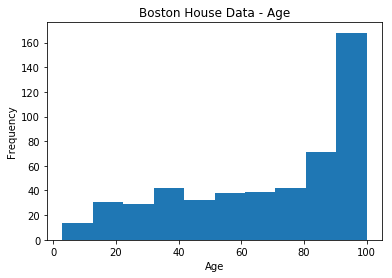

In [17]:
# Us Histogram for Numeric Data and its Frequency Distribution
import matplotlib.pyplot as plt
df['AGE'].plot.hist(title='Boston House Data - Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()